In [4]:
# imports
import numpy as np
import matplotlib.pyplot as plt

# import constants
h = 6.626e-27  # Planck's constant in cgs
c = 3.0e10     # Speed of light in cgs
kB = 1.38e-16  # Boltzmann constant in cgs
T_CMB = 2.725  # Rest frame temperature of CMB in Kelvin


In [14]:
# Function to calculate Planck spectrum
def planck_spectrum(freq, T):
    return (2 * h * freq ** 3 / c ** 2) / (np.exp(h * freq / (kB * T)) - 1)


def doppler_shift(freq_rest, v, theta):
    # Speed of light
    c = 3.0e10  # in cgs

    # Doppler shift formula
    cos_theta = np.cos(theta)
    freq_observed = freq_rest * np.sqrt((1 + v / c) / (1 - v / c)) * (1 - v * cos_theta / c)

    return freq_observed

def temperature_from_spectrum(frequency, spectrum):
    # Find the frequency at which the spectrum peaks
    peak_freq_index = np.argmax(spectrum)
    peak_freq = frequency[peak_freq_index]

    # Calculate temperature using Wien's law
    temperature = h * peak_freq / (kB * np.log(1 + h * peak_freq / (kB * T_CMB)))

    return temperature


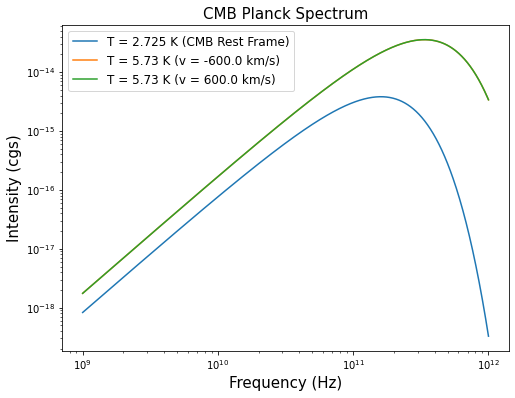

In [17]:
# Calculate frequency range
frequency = np.logspace(9, 12, 1000)  # Hz
#plot
plt.figure(figsize=(8, 6))
plt.loglog(frequency, planck_spectrum(frequency, T_CMB), label=f'T = {T_CMB} K (CMB Rest Frame)')
# Calculate the observed spectra for +/-600 km/s at theta = 0
# Calculate the observed spectra for +/-600 km/s at theta = 0 and obtain their temperatures
# Calculate the observed spectra for +/-600 km/s at theta = 0
v_values = [-600e5, 600e5]
for v in v_values:
    # Doppler shift to get observed frequencies
    observed_freq = doppler_shift(frequency, v, 0)
    
    # Calculate temperature using Wien's law based on the observed frequencies
    T_observed = temperature_from_spectrum(observed_freq, planck_spectrum(observed_freq, T_CMB))
    
    plt.loglog(observed_freq, planck_spectrum(frequency, T_observed), label=f'T = {T_observed:.2f} K (v = {v / 1e5} km/s)')

plt.xlabel('Frequency (Hz)', size=15)
plt.ylabel('Intensity (cgs)', size=15)
plt.title('CMB Planck Spectrum', size=15)
plt.legend(fontsize=12)
plt.show()